# Changes



* Convolutional Neural Net
* More degree of freedom (Larger Filter)
* Using Relu as activation function
* Add DropOut at fully connected layer
* Adaptive Learning Rate - AdamOptimizer
* initialize Bias,Weights as non-zero
* Weights initialised with small random values between -0.2 and +0.2



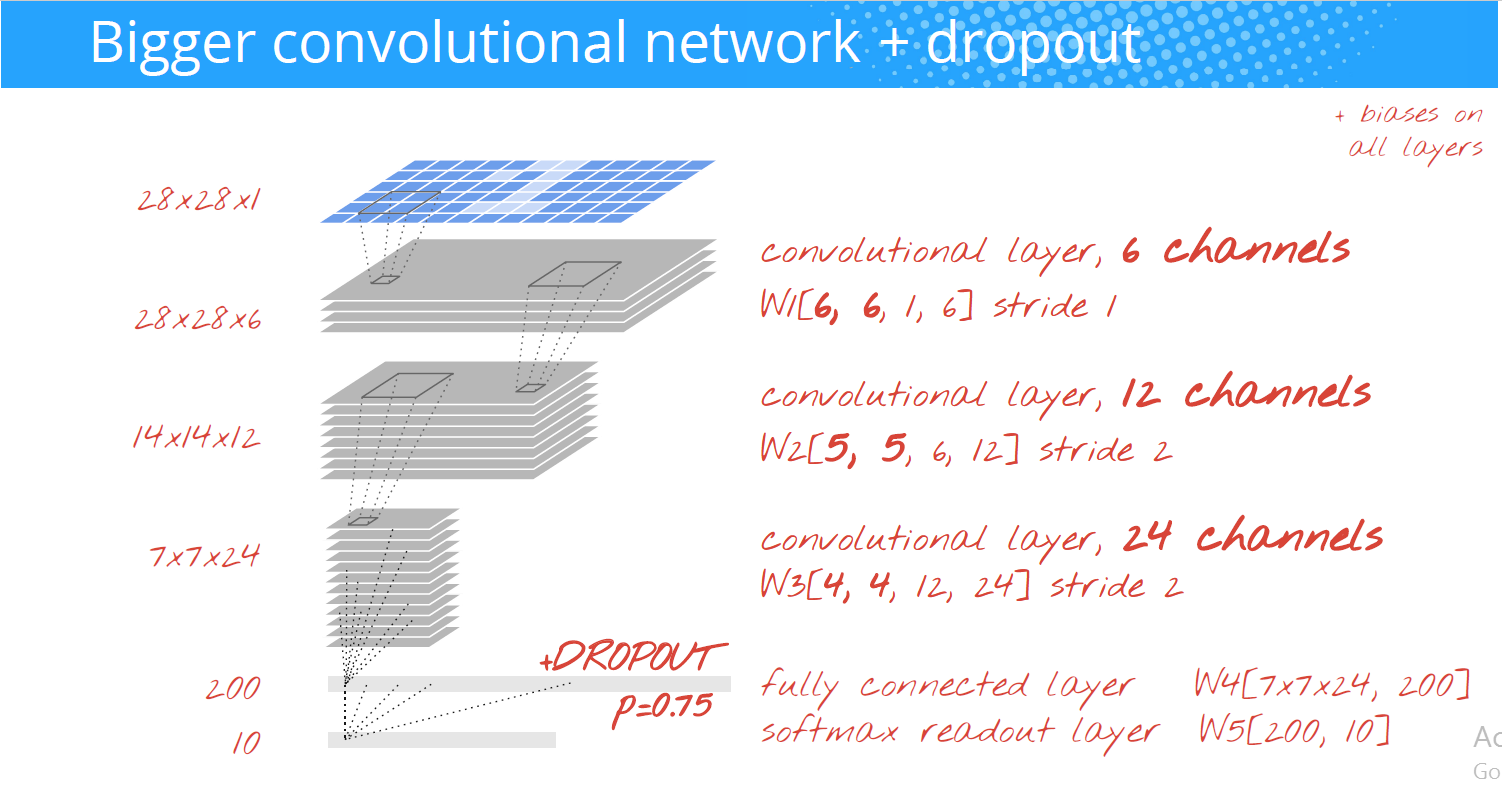

In [30]:
from IPython.display import Image
Image(filename='G:\\Machine Learning\\GoogleCloudTF\\Large-CovNet-DropOut.png')

In [6]:
import tensorflow as tf
import math
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data', one_hot=True,reshape=False, validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [17]:
x = tf.placeholder(tf.float32,[None,28,28,1])
y = tf.placeholder(tf.float32,[None,10])

# Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
pkeep = tf.placeholder(tf.float32)
# Learning Rate
lr = tf.placeholder(tf.float32)

In [18]:
K = 6 ; L = 12; M = 24; N=200;

W1 = tf.Variable( tf.truncated_normal( [6,6,1,K],stddev=0.1 ) )
W2 = tf.Variable( tf.truncated_normal( [5,5,K,L],stddev=0.1 ) )
W3 = tf.Variable( tf.truncated_normal( [4,4,L,M],stddev=0.1 ) )
W4 = tf.Variable( tf.truncated_normal( [7*7*M,N],stddev=0.1 ) )
W5 = tf.Variable( tf.truncated_normal( [N,10],stddev=0.1 ) )

B1 = tf.Variable(tf.ones([K])/10)
B2 = tf.Variable(tf.ones([L])/10)
B3 = tf.Variable(tf.ones([M])/10)
B4 = tf.Variable(tf.ones([N])/10)
B5 = tf.Variable(tf.ones([10])/10)

In [19]:
# The Model

stride = 1  # output is 28x28
Y1 = tf.nn.relu(tf.nn.conv2d(x,W1,strides=[1,stride,stride,1],padding='SAME')+B1)
stride = 2  # output is 14x14
Y2 = tf.nn.relu(tf.nn.conv2d(Y1,W2,strides=[1,stride,stride,1],padding='SAME')+B2)
stride = 2  # output is 7x7
Y3 = tf.nn.relu(tf.nn.conv2d(Y2,W3,strides=[1,stride,stride,1],padding='SAME')+B3)

# reshape the output from the third convolution for the fully connected layer
YY = tf.reshape(Y3,shape=[-1,7*7*M])
Y4 = tf.nn.relu(tf.matmul(YY,W4)+B4)
Y4d =  tf.nn.dropout(Y4, pkeep)



logits = tf.matmul(Y4d,W5)+B5
y_pred = tf.nn.softmax(logits)

In [20]:
cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y) )
#optimizer = tf.train.GradientDescentOptimizer(0.05)
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cross_entropy) 

# 1# For Beginner 
We find the accuracy for testing data

In [25]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# learning rate decay
max_learning_rate = 0.003
min_learning_rate = 0.0001
decay_speed = 2000.0

for _ in range(10000):
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
    
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys, pkeep:0.75, lr:learning_rate}       
    sess.run(train_step, feed_dict=training_data)
   
print(sess.run(accuracy,feed_dict={x:data.test.images,y:data.test.labels,pkeep:1}))

0.9918


# 2# Better visualization 
Here we can see the improvement of accuray and cross_entropy as we train more data 

In [22]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# train data
training_acc = []
training_ce = []
test_acc = []
test_ce = []
# learning rate decay
max_learning_rate = 0.003
min_learning_rate = 0.0001
decay_speed = 2000.0

import numpy as np
for i in range(10000):
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)    
  
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys, pkeep:0.75 ,lr:learning_rate}
    sess.run(train_step, feed_dict=training_data)

    if  np.remainder([i], 100) == 0:
        acc,ce = sess.run([accuracy,cross_entropy], feed_dict=training_data)
        training_acc.append(acc)
        training_ce.append(ce)
        
        test_data = {x:data.test.images,y:data.test.labels,pkeep:1}
        acc2,ce2 = sess.run([accuracy,cross_entropy],feed_dict=test_data)
        test_acc.append(acc2)
        test_ce.append(ce2)
    
    


In [23]:
test_data = {x:data.test.images,y:data.test.labels,pkeep:1}
test_accuracy,test_crossentropy = sess.run([accuracy,cross_entropy],feed_dict=test_data)
print('Testing Accuracy:\t',test_accuracy)
print('Testing Cross Entropy:\t',test_crossentropy)

Testing Accuracy:	 0.9918
Testing Cross Entropy:	 0.0331954


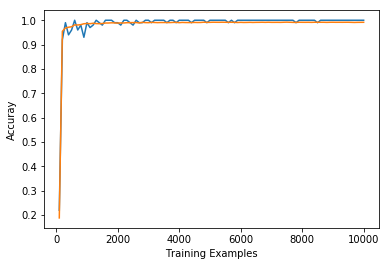

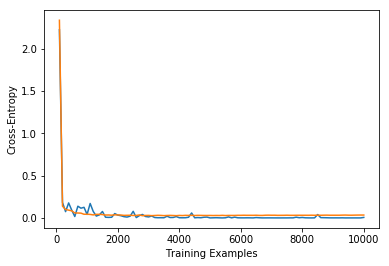

In [24]:
import matplotlib.pyplot as plt
l = np.arange (100,10001,100)
plt.plot(l,training_acc)
plt.plot(l,test_acc)
plt.xlabel('Training Examples')
plt.ylabel('Accuray')
plt.show()

plt.plot(l,training_ce)
plt.plot(l,test_ce)
plt.xlabel('Training Examples')
plt.ylabel('Cross-Entropy')
plt.show()

